# MCC Precipitation
## Carl Doedens

In [1]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Set your username and token here!
username = 'cdoedens'
token = '3ad8489884ef9883'

# Set the datastream and start/enddates

startdate = '2024-04-15'
enddate = '2025-02-03'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication

In [3]:
datastream = 'kcgwbpluvio2M1.a1'
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_wb = act.io.read_arm_netcdf(result)

ds_wb.clean.cleanup()
ds_wb = act.qc.arm.add_dqr_to_qc(ds_wb)
ds_wb.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

[DOWNLOADING] kcgwbpluvio2M1.a1.20241005.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241102.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240907.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241118.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241010.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241212.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20250114.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241128.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20250203.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241208.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240423.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241007.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240419.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241101.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241029.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240711.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241113.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20241120.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1.20240904.000000.nc
[DOWNLOADING] kcgwbpluvio2M1.a1

In [4]:
# # AOSMET - Just to get the wind data!
# datastream = 'kcgaosmetS2.a1'
# result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
# ds_met = act.io.read_arm_netcdf(result)

# ds_met.clean.cleanup()
# ds_met = act.qc.arm.add_dqr_to_qc(ds_met)
# ds_met.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

In [7]:
datastream = 'kcgvdisM1.b1'
startdate = '2024-09-16'
enddate = '2024-09-20'

result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)
ds_vdis = act.io.read_arm_netcdf(result)

ds_vdis.clean.cleanup()
ds_vdis = act.qc.arm.add_dqr_to_qc(ds_vdis)
ds_vdis.qcfilter.datafilter(rm_assessments=['Bad'], del_qc_var=False)

[DOWNLOADING] kcgvdisM1.b1.20240916.000000.cdf
[DOWNLOADING] kcgvdisM1.b1.20240918.000000.cdf
[DOWNLOADING] kcgvdisM1.b1.20240920.000000.cdf
[DOWNLOADING] kcgvdisM1.b1.20240917.000000.cdf
[DOWNLOADING] kcgvdisM1.b1.20240919.000000.cdf

If you use these data to prepare a publication, please cite:

Zhu, Z., & Wang, D. Video Disdrometer (VDIS), 2024-09-16 to 2024-09-20, ARM
Mobile Facility (KCG), kennaook ⁄ Cape Grim, Tasmania, Australia; AMF2 (main
site for CAPE-k) (M1). Atmospheric Radiation Measurement (ARM) User Facility.
https://doi.org/10.5439/1992988



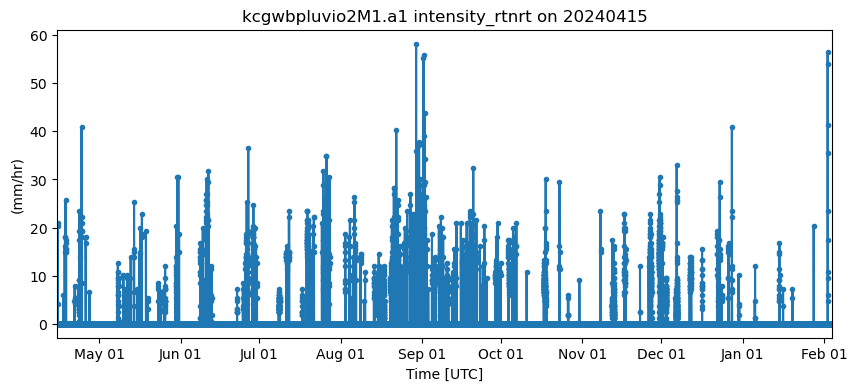

In [10]:
# plot rainfall intensity from weighing bucket
display = act.plotting.TimeSeriesDisplay(ds_wb, figsize=(10, 4), subplot_shape=(1,))
display.plot('intensity_rtnrt', subplot_index=(0,))

plt.show()

In [11]:
# make pandas DF with intensity and hourly avg
rain_df = pd.DataFrame(
    {'intensity_rtnrt': ds_wb['intensity_rtnrt'].values,
    'time': ds_wb['intensity_rtnrt'].time}
).set_index('time')

rain_df["intensity_hourly_avg"] = rain_df["intensity_rtnrt"].rolling(window=60, center=True, min_periods=1).mean()

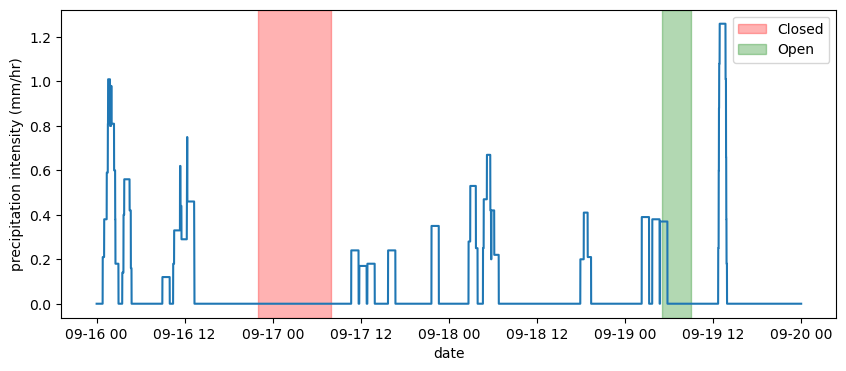

In [17]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(rain_df['intensity_hourly_avg'].loc['2024-09-16 00:00:00': '2024-09-20 00:00:00'])
ax.set_xlabel('date')
ax.set_ylabel('precipitation intensity (mm/hr)')

closed_start = pd.to_datetime("2024-09-16 22:00:00")
closed_end = pd.to_datetime("2024-09-17 08:00:00")
open_start = pd.to_datetime("2024-09-19 05:00:00")
open_end = pd.to_datetime("2024-09-19 09:00:00")

plt.axvspan(closed_start, closed_end, color="red", alpha=0.3, label="Closed")
plt.axvspan(open_start, open_end, color="green", alpha=0.3, label="Open")

plt.legend()

# plt.savefig('images/precipitation-time-series.png')

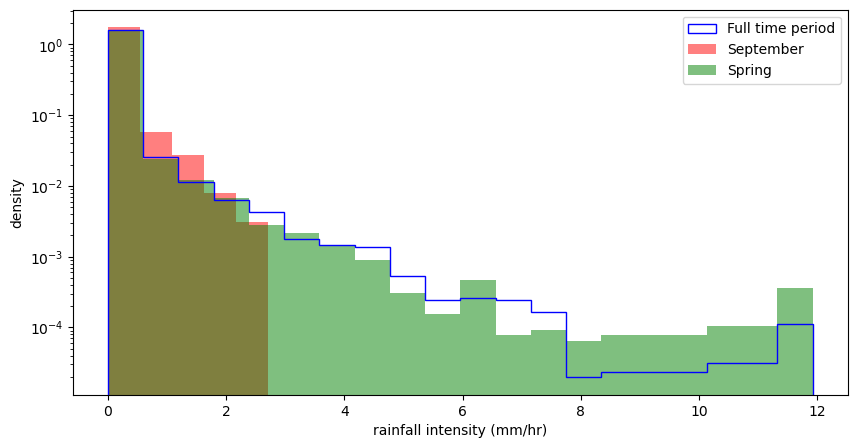

In [13]:
# PDFs of rain intensity
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(
    rain_df['intensity_hourly_avg'],
    density=True,
    bins=20,
    label='Full time period',
    color='blue',
    histtype='step',
    log=True
)
ax.hist(
    rain_df['intensity_hourly_avg'].loc['2024-09-01 00:00:00': '2024-09-30 00:00:00'],
    density=True,
    bins=5,
    alpha=0.5,
    label='September',
    color='red',
    log=True
)
ax.hist(
    rain_df['intensity_hourly_avg'].loc['2024-09-01 00:00:00': '2024-11-30 00:00:00'],
    density=True,
    bins=20,
    alpha=0.5,
    label='Spring',
    color='green',
    log=True
)
ax.legend()
ax.set_xlabel('rainfall intensity (mm/hr)')
ax.set_ylabel('density')

plt.savefig('images/precip-intensity-pdfs.png')

In [14]:
# # Now we can plot up a wind rose of that entire month's worth of data
# windrose = act.plotting.WindRoseDisplay(ds_met, figsize=(10,8))
# windrose.plot('wind_direction', 'wind_speed', spd_bins=np.linspace(0, 10, 5))
# windrose.axes[0].legend()
# # plt.savefig('images/wind-rose.png')
# plt.show()

In [15]:
# ds_combined = xr.merge([ds_met, ds_wb], compat='override')

# # Plot out the data rose using the WindRose display object
# display = act.plotting.WindRoseDisplay(ds_combined)
# display.plot_data('wind_direction', 'wind_speed', 'intensity_rtnrt', num_dirs=15, plot_type='line', line_plot_calc='mean')

# # plt.savefig('images/precipitation-rose.png')
# plt.show()

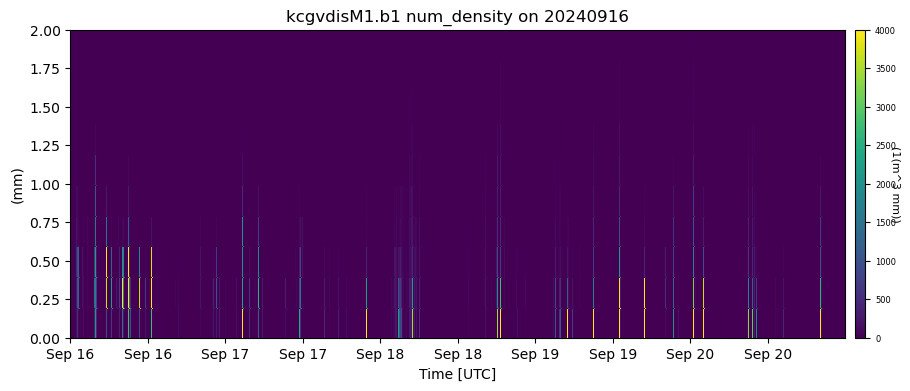

In [22]:
display = act.plotting.TimeSeriesDisplay(ds_vdis, figsize=(10, 4), subplot_shape=(1,))
display.plot('num_density', subplot_index=(0,), vmax=4000)
display.axes[0].set_ylim(0, 2)

plt.show()

In [29]:
# make pandas DF with intensity and hourly avg
vdis_df = pd.DataFrame(
    {'rain_rate': ds_vdis['rain_rate'].values,
    'time': ds_vdis['rain_rate'].time}
).set_index('time')

vdis_df["rain_rate_hourly_avg"] = vdis_df["rain_rate"].rolling(window=60, center=True, min_periods=1).mean()

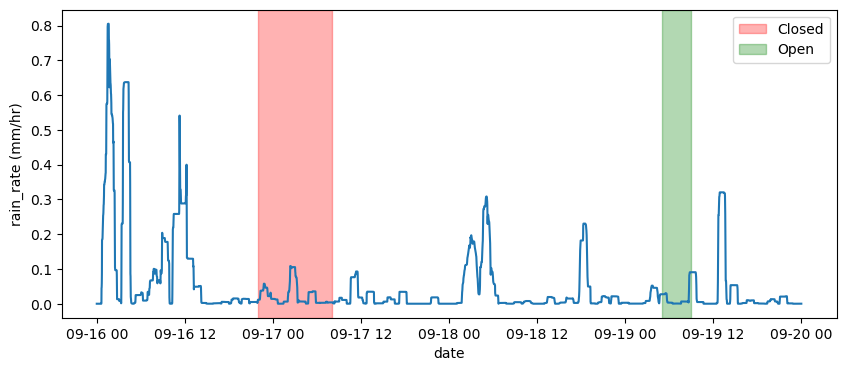

In [31]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(vdis_df['rain_rate_hourly_avg'].loc['2024-09-16 00:00:00': '2024-09-20 00:00:00'])
ax.set_xlabel('date')
ax.set_ylabel('rain_rate (mm/hr)')

closed_start = pd.to_datetime("2024-09-16 22:00:00")
closed_end = pd.to_datetime("2024-09-17 08:00:00")
open_start = pd.to_datetime("2024-09-19 05:00:00")
open_end = pd.to_datetime("2024-09-19 09:00:00")

plt.axvspan(closed_start, closed_end, color="red", alpha=0.3, label="Closed")
plt.axvspan(open_start, open_end, color="green", alpha=0.3, label="Open")

plt.legend()

# plt.savefig('images/precipitation-time-series.png')